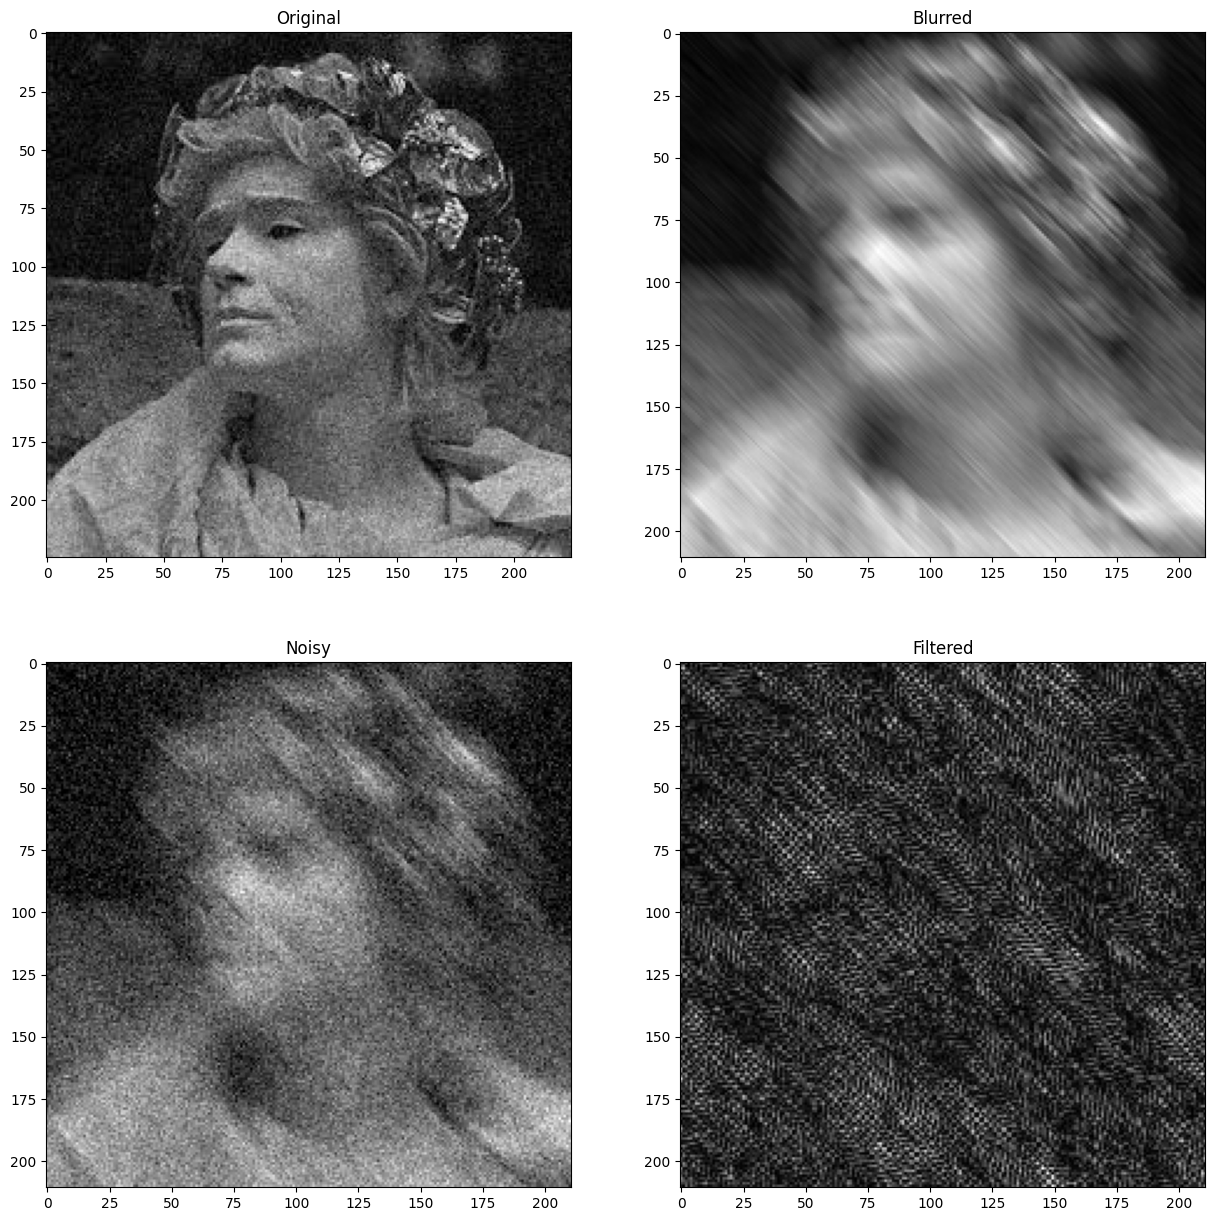

In [ ]:
import os
import cv2
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal.windows import gaussian
from scipy.signal import convolve2d
import matplotlib.pyplot as plt


#Inverse Filtering

filename = 'noise.jpeg'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def blur(img, kernel_size = 3):
    dummy = np.copy(img)
    h = np.eye(kernel_size) / kernel_size
    dummy = convolve2d(dummy, h, mode = 'valid')
    return dummy

def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img+gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

def inverse_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = 1 / (kernel + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy


def gaussian_kernel(kernel_size):
    kernel_size = 5
    kernel = gaussian(kernel_size, std = 1)
    kernel = np.outer(kernel, kernel)
    return kernel
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

if __name__ == '__main__':

  blurred_img = blur(img, kernel_size = 15)
  noisy_img = add_gaussian_noise(blurred_img, sigma = 20)

  kernel = gaussian_kernel(kernel_size= 3)
  filtered_img = inverse_filter(noisy_img, kernel, K = 0.01)

  display = [img, blurred_img, noisy_img, filtered_img]
  titles = ['Original', 'Blurred', 'Noisy', 'Filtered']

  fig = plt.figure(figsize=(15, 15))
  for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap='gray')
    plt.title(titles[i])

  plt.show()